importing all the libraries and packages


importing the framework and the data.
Preparing the input data for the model 
 Scaling, Spliting, Encoding 

In [47]:
#importin all the related packages nad framework

import pandas as pd
import tensorflow as tf
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

import matplotlib.pyplot as plt



In [48]:
#geting the data and preparing the data

#loading data
iris_data = pd.read_csv('G:\projects\multiclass_classification_iris\data\iris.csv')

print("data before numeric conversion \n", iris_data.head())

#using label encoder to convert the string to numeric values 

label_encoder = preprocessing.LabelEncoder()
iris_data['Species']= label_encoder.fit_transform(iris_data['Species'])

#converting string to numpy array 
train_data = iris_data.to_numpy()

#separting features and labels
features = train_data[:,0:4]
labels = train_data[:,4]

#displaying the features 
print("data after the numeric conversion \nfeatures \n" , features[:5,:])

#displaying the labels 
print("labels \n", labels[:5])


data before numeric conversion 
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
data after the numeric conversion 
features 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
labels 
 [0. 0. 0. 0. 0.]


In [49]:
#creating a scaler model that is fit on the input data.
scaler = StandardScaler().fit(features)

#scaling the numeric feature variable
features = scaler.transform(features)


#encoding the target variables as one_hot_encoding array
labels = tf.keras.utils.to_categorical(labels,3)


In [50]:

#splitting the data into trinaing and testing set
X_train,X_test,Y_train,Y_test = train_test_split(features , labels, test_size = 0.10)

#printing the splited data

print("\nTraining features \n", X_train[:5])
print("\nTraining labels \n", Y_train[:5])
print("\nTesting features \n", X_test[:5])
print("\nTesting labels \n", Y_test[:5])



Training features 
 [[-0.29484182 -0.36217625 -0.08980313  0.13250973]
 [-0.90068117  0.55861082 -1.16971425 -0.92054774]
 [-1.26418478  0.09821729 -1.22655167 -1.3154443 ]
 [-1.02184904 -2.43394714 -0.14664056 -0.26238682]
 [ 1.2803405   0.09821729  0.76275827  1.44883158]]

Training labels 
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Testing features 
 [[ 0.4321654  -0.36217625  0.30805885  0.13250973]
 [ 0.55333328  0.55861082  1.27429511  1.71209594]
 [ 0.55333328 -0.82256978  0.64908342  0.79067065]
 [-1.02184904  0.55861082 -1.34022653 -1.3154443 ]
 [-1.74885626 -0.13197948 -1.39706395 -1.3154443 ]]

Testing labels 
 [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


Creating a model includes following 
 1. Number of hidden layers
 2. Number of nodes in each layer
 3. Acitvation function
 4. Loss Function and Accuracy Measurement
 

In [51]:
#creating a sequential model in keras
model  = tf.keras.models.Sequential()

#adding a first hidden layer with relu activation function 
model.add(tf.keras.layers.Dense(128, input_shape=(4,), name = 'Hidden_layer_1',activation='relu'))
                               #number of nodes, number of input variables, logical name, Activation function

#adding second layer  with relu activation function 
model.add(tf.keras.layers.Dense(128,name = 'Hidden_layer_2',activation = 'relu'))

#adding an output layer with sofmax activation function
model.add(tf.keras.layers.Dense(3,name = 'Output_layer', activation= 'softmax'))

#compile the model with loss and metrices
model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'])

#printing the  metadata of the model 
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 128)               640       
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________



Training our evaluating our model

it involves defining various training models and then perform forward and back propagation




 training progress 

Epoch 1/10
14/14 [==============================] - 1s 14ms/step - loss: 0.8545 - accuracy: 0.7315 - val_loss: 0.5257 - val_accuracy: 0.8889
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.8426 - val_loss: 0.3568 - val_accuracy: 0.9259
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8611 - val_loss: 0.2803 - val_accuracy: 0.9259
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8426 - val_loss: 0.2380 - val_accuracy: 0.9630
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.8796 - val_loss: 0.2088 - val_accuracy: 0.9630
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2449 - accuracy: 0.8704 - val_loss: 0.2026 - val_accuracy: 0.8889
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.8889 - val_loss: 0.1590 - val_accuracy: 1.00

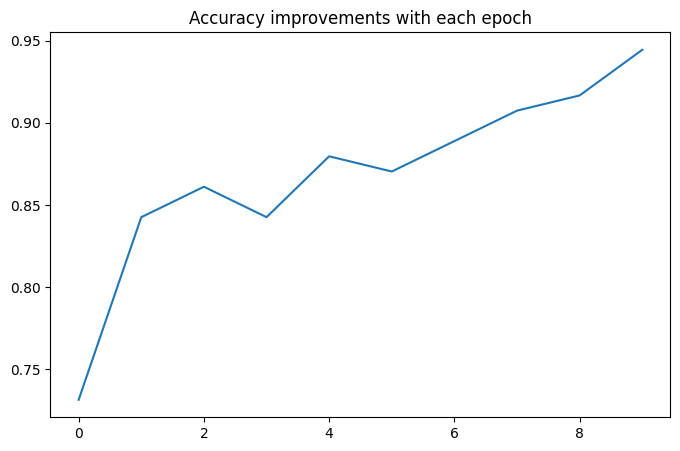


 evaluation against test Dataset 

1/1 [==============================] - 0s 24ms/step - loss: 0.2997 - accuracy: 0.8000


[0.2996542751789093, 0.800000011920929]

In [52]:
#setting batch_size
BATCH_SIZE = 8

#setting epochs 
EPOCHS = 10

#setting validation split. 20% of the training data will be used for the validation after each epoch
VALIDATION_SPLIT = 0.2

print("\n training progress \n")
#fit the model. perforiming entire training cycle, including forward propagation , loss computation , backward propagation , gradient and all of the computation
history = model.fit(X_train, Y_train,
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS, 
                    verbose = 1,
                    validation_split = VALIDATION_SPLIT)

print("\n Accuracy \n")

#plotting accuracy of the model after each epoch

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with each epoch")
plt.show()


#evaluating the model 

print("\n evaluation against test Dataset \n")
model.evaluate(X_test,Y_test)


saving and loding the modle

models need to be saved after they are validated. they are then loaded into the inference  environments for actual prediction 


In [53]:
#saving model 

model.save("iris_model")

#loading the model

loaded_model = tf.keras.models.load_model("iris_model")

#loading model summary 
 
loaded_model.summary()
 


INFO:tensorflow:Assets written to: iris_model\assets


INFO:tensorflow:Assets written to: iris_model\assets


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 128)               640       
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


Making acutal predictions 


In [54]:
#Raw prediction data
prediction_input = [[6.,3.1,4.,1.4]]

#scale prediction data with the same scaling model 
scaled_input = scaler.transform(prediction_input)

#getting probability
raw_prediction = model.predict(scaled_input)

print("\n the raw predictions is ", raw_prediction)

#find prediction 
prediction = np.argmax(raw_prediction)

print("prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 67ms/step

 the raw predictions is  [[0.04770333 0.69864476 0.2536519 ]]
prediction is  ['versicolor']
